<div style='width: auto; float: center'/>
<table align="center">
    <tr>
        <th>
                <img src="https://ingenieria.unal.edu.co/pri/images/catedra_header_2021.png" style='height: 200px; width: auto; object-fit: contain;float: center'/>                                		
        </th>     
    </tr>
</table>

</div>

<div >
  <h1 align="center">  Asset Management Principles For Modern Power Systems    </h1>  
  <h2 align="center">  Unit 2: Condition Assessment     </h2>    
			<h3 align="center">    David L. Alvarez A, Ph.D    </h3>
			<h4 align="center">    dlalvareza@unal.edu.co      </h4>
            <h4 align="center">    Copyright (c) 2021 dlalvareza    </h4>
</div>	

<div style='width: auto; float: center'/>
<table align="center">
    <tr>
        <th>
       <img src="https://www.uqtr.ca/u20-img/logos/logo-uqtr-entete.png" style='height: 75px; width: auto; object-fit: contain;float: right'/>                                	
        </th>                 
        <th>
                <img src="https://oraprdnt.uqtr.uquebec.ca/pls/public/docs/GSC6627/O0003430433_GREI_LOGO_court.PNG" style='height: 75px; width: auto; object-fit: contain;float: right'/>                                		
        </th>  
        <th>
                <img src="https://oraprdnt.uqtr.uquebec.ca/pls/public/docs/GSC6627/O0003430597_MRIF_w3_couleur.png" style='height: 75px; width: auto; object-fit: contain;float: right'/>                                		
        </th>  
        <th>
       <img src="../STATIC/EMC_ACI.svg" style='height: 50px; width: auto; object-fit: contain;float: right'/>                                	
        </th>                 
        <th>
                <img src="https://unal.edu.co/typo3conf/ext/unal_skin_default/Resources/Public/images/escudoUnal_black.png" style='height: 75px; width: auto; object-fit: contain;float: right'/>                                		
        </th>          
    </tr>
</table>    

## Introduction
Whit this notebook, the conditions assessment is performed. The analysis is carried out by assessing the historical condition records  

## CIGRE network benchmark DER in Medium Voltage Systems
![title](../STATIC/01_CIGRE_MV_Distribution_DER_Assets_Criticality.svg)

### Neccesary libraries

In [1]:
import sys
import datetime 
import pandas as pd
import calendar
from ipywidgets import interact
from ipywidgets import fixed
from bokeh.io import export_svgs
from bokeh.io import push_notebook, show, output_notebook

### Load PywerAPM libraries

In [2]:
sys.path.insert(0,'../CASES/05_Challenge_Data/')
sys.path.insert(0,'../APM/BIN/')
from APM_Run import run_condition
from ST_AM_Contingencies_Ploty import Plot_Asset_Condition_Assessment, Asset_Condition_by_Type
from ST_AM_Contingencies_Ploty import Radar_Plot_by_Asset, HI_Radar_Plot_I, POF_Radar_Plot_I 
from PywerAM_bokeh_tools import plot_condition_forecast, Plot_HI_Forecast_Stacked,plot_condition_assessment,plot_decision_making, plot_scenario

# 1. Condition Assessment

## 1.1 Import case settings

In [3]:
from PywerAPM_Case_Setting import*

## 2.1 Run asset fleet condition
<div style='width: auto; float: center'/>
<table align="center">
    <tr>
        <th>
                <img src="../STATIC/07_Health_Index_Computation.svg" style='height: 300px; width: auto; object-fit: contain;float: right'/>                                		
        </th>     
    </tr>
</table>

</div>

In [4]:
_,_,assets = run_condition()

../APM/BIN/APM_Module_Tools.py:35: RuntimeWarning: invalid value encountered in power
  return (1 - np.exp(-((t*beta)**(1/alpha))))
../APM/BIN/APM_Module_Tools.py:35: RuntimeWarning: overflow encountered in power
  return (1 - np.exp(-((t*beta)**(1/alpha))))
../APM/BIN/APM_Module_Tools.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return (1 - np.exp(-((t*beta)**(1/alpha))))
../APM/BIN/APM_Module_Tools.py:35: RuntimeWarning: divide by zero encountered in power
  return (1 - np.exp(-((t*beta)**(1/alpha))))
../APM/BIN/APM_Module.py:222: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dic =  df.to_dict('r')
/home/dlalvareza/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map 

In [5]:
def choose_asset_type(asset_type,Assets):
    df         = Assets.Asset_Portfolio_List
    asset_list = list(df[df['Type']==asset_type].index)
    condition_list = []
    for n in asset_list:
        asset          = Assets.Asset_Portfolio[n]
        l_list         =list(asset.cond.keys())
        condition_list = list(set(condition_list+l_list))
    interact(plot_condition, Cond_Name = condition_list,assets=fixed(Assets),asset_type=fixed(asset_type))
    
def plot_condition(assets,Cond_Name,asset_type):     
    df = assets.Asset_Portfolio_List
    asset_list = df[df['Type']==asset_type]
    asset_list = list(asset_list.index)
    Asset_Condition_by_Type(asset_list,assets,Cond_Name)

interactive(children=(Dropdown(description='asset_type', options=('AUX', 'CB_SF6', 'TR', 'CB', 'LN', 'GEN', 'B…

<function __main__.choose_asset_type(asset_type, Assets)>

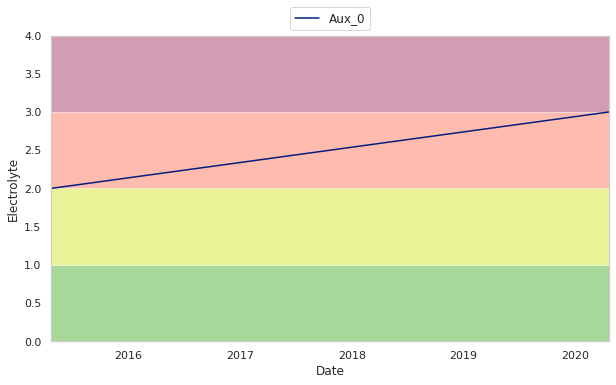

In [6]:
df         = assets.Asset_Portfolio_List
asset_type = assets.Asset_Portfolio_List['Type'].unique()
interact(choose_asset_type, asset_type=asset_type,Assets=fixed(assets))

## 2.2 Condition forecasting
\begin{equation*}
S \left( t \right) = 1- e ^{-\left(\frac{t}{l}\right)^m}
\end{equation*}

In [7]:
output_notebook()
def update_aset_cond(Asset_Name):
    df             = assets.Asset_Portfolio_List
    asset_id = df[df['Name'] == Asset_Name].index.values[0]
    l_asset  = assets.Asset_Portfolio[asset_id]
    Cond_list = list(l_asset.cond.keys())
    interact(update_condition_plot,Cond=Cond_list,asset=fixed(l_asset))
    
def update_condition_plot(Cond,asset):
    p  = plot_condition_forecast(Cond,asset,n_days)
    show(p, notebook_handle=True)
    push_notebook()

Loading BokehJS ...

In [8]:
asset_list_name = list(assets.Asset_Portfolio_List.Name)
interact(update_aset_cond, Asset_Name=asset_list_name);

interactive(children=(Dropdown(description='Asset_Name', options=('Aux_0', 'CB_0_1', 'CB_0_12', 'TR_0_1', 'TR_…

## 2.2 Health index forecasting
\begin{equation*}
 HI \left( {\color{DColor9}t} \right) = \cfrac{\sum\limits_{n=1}^{N}\beta_n(S\left(  {\color{DColor9}t}\right)_n \cdot w_n)}{\sum\limits_{n=1}^N\beta_n w_n}
\end{equation*}

In [9]:
# Radar plots
def choose_asset_type_radar(asset_type,Assets):
    df         = Assets.Asset_Portfolio_List
    asset_list = list(df[df['Type']==asset_type].Name)
    interact(plot_condition_radar, Asset_Name = asset_list,assets=fixed(Assets))
    
def plot_condition_radar(Asset_Name,assets):     
    df = assets.Asset_Portfolio_List
    asset_list = df[df['Name']==Asset_Name]
    asset_id   = list(asset_list.index)[0]
    l_asset    = assets.Asset_Portfolio[asset_id]      
    Radar_Plot_by_Asset(l_asset,test_date)

In [10]:
def l_asset_type(asset_type):
    df         = assets.Asset_Portfolio_List
    asset_list = list(df[df['Type']==asset_type].Name)
    interact(update_HI_plot, Asset_Name=asset_list)
def update_HI_plot(Asset_Name):
    df             = assets.Asset_Portfolio_List
    asset_id       = df[df['Name'] == Asset_Name].index.values[0]      #global asset_id
    print('Asset Id:' +str(asset_id))
    asset         = assets.Asset_Portfolio[asset_id]
    date_for      = [date_beg + datetime.timedelta(days=x) for x in range(n_days)]
    
    fig           = Plot_HI_Forecast_Stacked(asset,date_for)
    show(fig, notebook_handle=True)
    push_notebook()

interactive(children=(Dropdown(description='asset_type', options=('AUX', 'CB_SF6', 'TR', 'CB', 'LN', 'GEN', 'B…

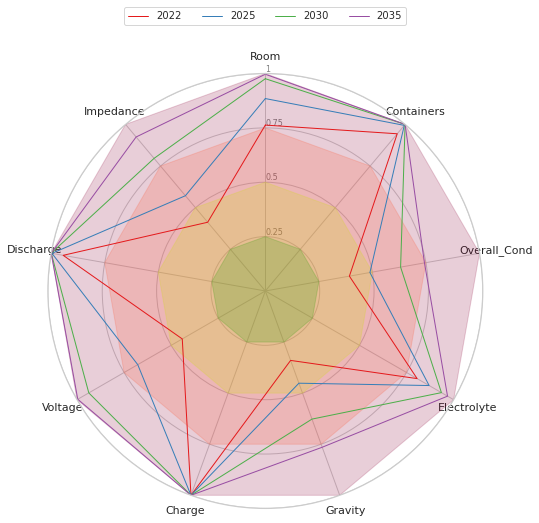

In [11]:
test_date        = [date_beg,test_date_3,test_date_4,test_date_5] 
df               = assets.Asset_Portfolio_List
asset_type       = assets.Asset_Portfolio_List['Type'].unique()
interact(choose_asset_type_radar, asset_type=asset_type,Assets=fixed(assets));

In [12]:
def HI_Radar_Plot_type(l_type,Assets):
    print(l_type)
    if l_type== 'HI':
        HI_Radar_Plot_I(assets,test_date,Type=asset_type)
    elif l_type== 'POF':
        POF_Radar_Plot_I(assets,15*8760,test_date,date_beg,Type=asset_type)

interactive(children=(Dropdown(description='l_type', options=('HI', 'POF'), value='HI'), Output()), _dom_class…

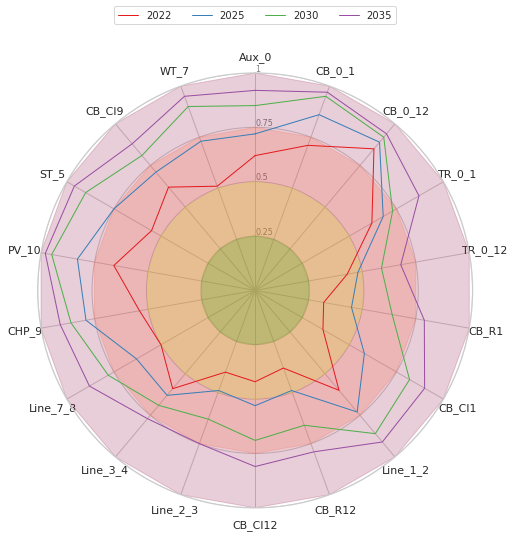

In [13]:
l_list = ['HI','POF']
interact(HI_Radar_Plot_type, l_type=l_list,Assets=fixed(assets));

In [14]:
# Historical Health index plot
# Radar plots
def HI_Radar_Plot_type(l_type,Assets):
    print(l_type)
    if l_type== 'HI':
        HI_Radar_Plot_I(assets,test_date,Type=asset_type)
    elif l_type== 'POF':
        POF_Radar_Plot_I(assets,15*8760,test_date,date_beg,Type=asset_type)

In [15]:
asset_list_type = list(assets.Asset_Portfolio_List['Type'].unique())
interact(l_asset_type, asset_type=asset_list_type);

interactive(children=(Dropdown(description='asset_type', options=('AUX', 'CB_SF6', 'TR', 'CB', 'LN', 'GEN', 'B…

In [16]:
# Radar plots
def choose_asset_type_radar(asset_type,Assets):
    df         = Assets.Asset_Portfolio_List
    asset_list = list(df[df['Type']==asset_type].Name)
    interact(plot_condition_radar, Asset_Name = asset_list,assets=fixed(Assets))
    
def plot_condition_radar(Asset_Name,assets):     
    df = assets.Asset_Portfolio_List
    asset_list = df[df['Name']==Asset_Name]
    asset_id   = list(asset_list.index)[0]
    l_asset    = assets.Asset_Portfolio[asset_id]      
    Radar_Plot_by_Asset(l_asset,test_date)

interactive(children=(Dropdown(description='asset_type', options=('AUX', 'CB_SF6', 'TR', 'CB', 'LN', 'GEN', 'B…

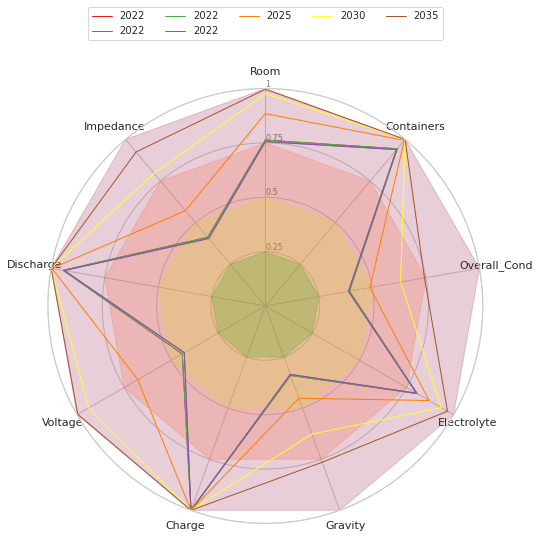

In [17]:
test_date        = [date_beg,test_date_2,test_date_3,test_date_4,test_date_5] 
df               = assets.Asset_Portfolio_List
asset_type       = assets.Asset_Portfolio_List['Type'].unique()
interact(choose_asset_type_radar, asset_type=asset_type,Assets=fixed(assets));

## Asset fleet


\begin{equation*}
POF \left(  {\color{DColor9}t}\right)= 1-R\left( {\color{DColor9}t}\right)
\end{equation*}

\begin{equation*}
R \left(  {\color{DColor9}t} \right)= e^{-\int_{T_i}^{T_{end}}\lambda \left( {\color{DColor9}t}\right) \, dt}
\end{equation*}




\begin{equation*}
\lambda\left( {\color{DColor9}t}\right)= {\color{DColor3}a} \cdot e^{ {\color{DColor3}b}\cdot HI \left( {\color{DColor9}t}\right)}+ {\color{DColor3}c}
\end{equation*}

## Decision Making assessment

### Load decisicion making Module

In [18]:
from ARM_Run import load_criticality
from PywerAM_Scenario_Assessment import Decision_Making
from OPT_Module import OPT
import plotly.graph_objects as go
from scipy.optimize import minimize
import numpy as np
from plotly.subplots import make_subplots

df_Fixed_Cr           = load_criticality(cr_type=case_settings['Cr'],assets=assets.Asset_Portfolio_List)  # Fixed criticality
df_ACP                = load_criticality()    # Montecarlo simulations
DMS                   = Decision_Making(assets,DF_ACP=df_ACP,df_AC_Fixed=df_Fixed_Cr)
DMS.load_scenario_base()

t_end     = 20       # Assumed asset end of life

        Name    Type  MTTR Disc_Type Asset_To_Disconet  Incomes  CAPEX  OPEX  \
ID                                                                             
1      Aux_0     AUX     4       BUS             Bus_0     5000  45000  3750   
2     CB_0_1  CB_SF6     6        TR            TR_0_1     7000  63000  5250   
3    CB_0_12  CB_SF6     6        TR           TR_0_12     7000  63000  5250   
4     TR_0_1      TR    24        TR            TR_0_1     8000  80000  6000   
5    TR_0_12      TR    24        TR           TR_0_12     7000  70000  5250   
6      CB_R1      CB     4        LO           Load_R1     8000  72000  6000   
7     CB_CI1      CB     4        LO          Load_CI1     3000  27000  2250   
8   Line_1_2      LN     5        LN          Line_1_2     6000  54000  4500   
9     CB_R12      CB     4        LO          Load_R12     3000  27000  2250   
10   CB_CI12      CB     8        LO         Load_CI12     8000  72000  6000   
11  Line_2_3      LN     5        LN    

/home/dlalvareza/anaconda3/lib/python3.7/site-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


        Name    Type  MTTR Disc_Type Asset_To_Disconet  Incomes  CAPEX  OPEX  \
ID                                                                             
1      Aux_0     AUX     4       BUS             Bus_0     5000  45000  3750   
2     CB_0_1  CB_SF6     6        TR            TR_0_1     7000  63000  5250   
3    CB_0_12  CB_SF6     6        TR           TR_0_12     7000  63000  5250   
4     TR_0_1      TR    24        TR            TR_0_1     8000  80000  6000   
5    TR_0_12      TR    24        TR           TR_0_12     7000  70000  5250   
6      CB_R1      CB     4        LO           Load_R1     8000  72000  6000   
7     CB_CI1      CB     4        LO          Load_CI1     3000  27000  2250   
8   Line_1_2      LN     5        LN          Line_1_2     6000  54000  4500   
9     CB_R12      CB     4        LO          Load_R12     3000  27000  2250   
10   CB_CI12      CB     8        LO         Load_CI12     8000  72000  6000   
11  Line_2_3      LN     5        LN    

In [19]:
from ST_AM_Contingencies_Analysis import Real_Time_Contingencies as Cont_Assessment
Cont_A = Cont_Assessment(case_settings,pp_case='json')

In [20]:
print(Cont_A.AM_Plan)

          Asset_Name     Des_Type       Date
Project_1      Aux_0      Replace 2027-10-01
Project_2     CB_0_1  Maintenance 2023-10-01
Project_3    CB_0_12  Maintenance 2025-01-01
Project_4    TR_0_12  Maintenance 2030-10-01
Project_5      CB_R1  Maintenance 2027-10-01
Project_6     CB_CI1  Maintenance 2027-10-01
Project_7   Line_1_2  Maintenance 2026-10-01
Project_8   Line_7_8  Maintenance 2027-10-01
Project_9       ST_5      Replace 2032-10-01


In [21]:
def asset_type_failure_plot(asset_type):
    l_list = assets.Asset_Portfolio_List[assets.Asset_Portfolio_List.Type==asset_type].Name
    interact(asset_failure_rate_plot, Asset_Name=l_list)
def asset_failure_rate_plot(Asset_Name):
    df          = assets.Asset_Portfolio_List
    asset_id    = df[df['Name'] == Asset_Name].index.values[0]
    l_asset     = assets.Asset_Portfolio[asset_id]
    data        = DMS.scenario['Base'][asset_id]
    opt_des     = OPT(l_asset,data)    
    
    df_current  = opt_des.Current_Con_Rel_asseesment(t_end)  # Do noting
    
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
    # Create figure with secondary y-axis
    fig = make_subplots(rows=2, cols=1,specs=[[{"secondary_y": True}],[{"secondary_y": False}]])
    # Add traces
    fig.add_trace(go.Scatter(x=df_current.Time, y=df_current.FR, name='Do nothing',line=dict(color='rgb(55, 83, 109)')),secondary_y=False,row=1, col=1)
    fig.add_trace(go.Scatter(x=df_current.Time, y=df_current.Sum_Fr, name='Cumulative',line=dict(color='rgb(55, 83, 109)', width=2, dash='dash')),secondary_y=True,row=1, col=1)
    
    # Add figure title
    # Set y-axes titles
    fig.update_yaxes(title_text="Failure rate per year", secondary_y=False)
    fig.update_yaxes(title_text='Cumulative Failure rate', secondary_y=True)
    fig.add_trace(go.Scatter(x=df_current.Time, y=df_current.pof,line=dict(color='rgb(55, 83, 109)'),showlegend=False),row=2, col=1)  
    
    # # # # # # # # # # # # # # # # # # Probability of failure # # # # # # # # # # # # # # # # # #
    # Identify project from the AM plan
    project = Cont_A.AM_Plan[Cont_A.AM_Plan['Asset_Name']==Asset_Name]
   
    if not project.empty:
        print(project)
        project = project.iloc[0]
        t_desc  = project.Date.date()#pd.to_datetime(project.Date).date()
        t_remp  = (t_desc-date_beg).days/365.25  # Replacement time
        if project.Des_Type == 'Replace':
            df_remp     = opt_des.Replacement_asseesment(t_end,t_remp)
            fig.add_trace(go.Scatter(x=df_remp.Time, y=df_remp.FR, name='Replacement',line=dict(color='firebrick')),secondary_y=False,row=1, col=1)
            fig.add_trace(go.Scatter(x=df_remp.Time, y=df_remp.Sum_Fr, name='Cumulative',line=dict(color='firebrick', width=2, dash='dash')),secondary_y=True,row=1, col=1)
            fig.add_trace(go.Scatter(x=df_remp.Time, y=df_remp.pof,line=dict(color='firebrick'),showlegend=False),row=2, col=1)   
        elif project.Des_Type == 'Maintenance':
            opt_des.maint_conditions(hi_rem=0.2)
            df_maint  = opt_des.Maintenance_asseesment(t_end,t_remp)
            fig.add_trace(go.Scatter(x=df_maint.Time, y=df_maint.FR, name='Maintenance',line=dict(color='firebrick')),secondary_y=False,row=1, col=1)
            fig.add_trace(go.Scatter(x=df_maint.Time, y=df_maint.Sum_Fr, name='Cumulative',line=dict(color='firebrick', width=2, dash='dash')),secondary_y=True,row=1, col=1)
            fig.add_trace(go.Scatter(x=df_maint.Time, y=df_maint.pof,line=dict(color='firebrick'),showlegend=False),row=2, col=1)   
        else:
            print('The decision does not exist')
    fig.update_yaxes(title_text="Probability of Failure", row=2, col=1)
    
    # Set x-axis title
    fig.update_xaxes(title_text="Time", row=2, col=1)
    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10),)
    
    fig.update_layout(paper_bgcolor='rgb(255,255,255)',plot_bgcolor='rgb(255,255,255)')
    fig.update_layout(margin=dict(l=10, r=10, t=10, b=10))
    fig.update_layout(legend=dict(x=0,y=0.9,))
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)    
    
    fig.show()    

In [22]:
interact(asset_type_failure_plot, asset_type=asset_list_type);

interactive(children=(Dropdown(description='asset_type', options=('AUX', 'CB_SF6', 'TR', 'CB', 'LN', 'GEN', 'B…